In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scikitplot as skplt 
from sklearn.metrics import precision_score , recall_score,f1_score,accuracy_score

In [3]:
data = pd.read_csv('pre_advertisment(after).csv')
data

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Internet usage bucket
0,0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,Above average
1,1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,Average
2,2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,Above average
3,3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,Above average
4,4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,Above average
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1,Average
996,996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1,Below average
997,997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1,Below average
998,998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0,Average


In [4]:
# replacing values 
data['Internet usage bucket'].replace(['Below average', 'Average', 'Above average'],[-1, 0, 1], inplace=True)
data.drop(['Unnamed: 0'], axis=1)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Internet usage bucket
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,1
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,1
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,1
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,1
...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1,0
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1,-1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1,-1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0,0


In [5]:
data.to_csv(r'C:\Users\96650\Desktop\pre_advertisment(after2).csv')

In [6]:
data['Clicked on Ad'].value_counts()

0    500
1    500
Name: Clicked on Ad, dtype: int64

In [36]:
feature_cols =['Daily Time Spent on Site','Age','Area Income','Internet usage bucket']
x=data[feature_cols]
y=data['Clicked on Ad']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)
clf = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 5)
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [37]:
accuracy = accuracy_score(y_test,y_pred)*100
recall = recall_score(y_test,y_pred)*100
precision = precision_score(y_test,y_pred)*100
f1 = metrics.f1_score(y_test,y_pred,average='binary')*100

print('Accuracy: %.2f'% accuracy,'%')
print('Recall: %.2f'% recall,'%')
print('Precision: %.2f'% precision,'%')
print('F1 score: %.2f'% f1,'%') 

Accuracy: 93.67 %
Recall: 88.96 %
Precision: 98.56 %
F1 score: 93.52 %


In [38]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(clf,x,y,cv=5)
print ('cross validation score: ', score)

cross validation score:  [0.97  0.945 0.975 0.935 0.95 ]


In [39]:
trainAcc = clf.score(x_train,y_train)*100
testAcc = clf.score(x_test,y_test)*100
print('Training Accuracy: %.2f'% trainAcc, '%')
print('Testing Accuracy: %.2f'% testAcc, '%')

Training Accuracy: 98.43 %
Testing Accuracy: 93.67 %


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

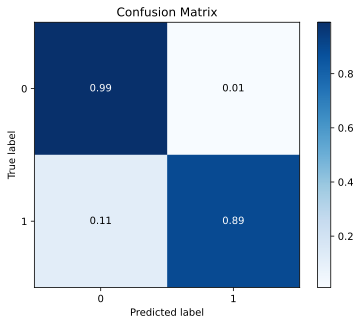

In [42]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred, normalize =True ,title='Confusion Matrix')

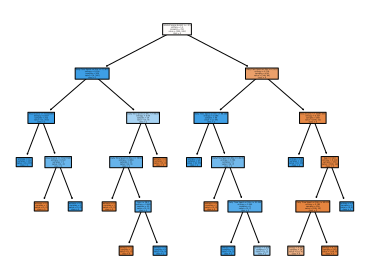

In [43]:
from sklearn import tree
%config InlineBackend.figure_format = 'svg'
plot = tree.plot_tree(clf, feature_names = feature_cols , class_names = '01', filled = True)